In [1]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
import librosa
import librosa.display
import soundfile

In [2]:
sample, sample_rate = librosa.load("input/flute_mono.wav")

In [3]:
s = librosa.stft(sample)
d = librosa.amplitude_to_db(abs(s), ref=np.max)

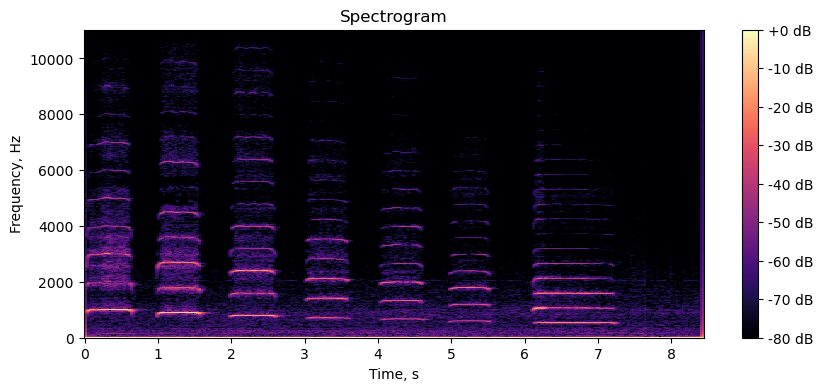

In [4]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(d, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.ylabel("Frequency, Hz")
plt.xlabel("Time, s")
plt.show()

In [5]:
filtered_sample = signal.wiener(sample, 10)
s = librosa.stft(
    filtered_sample)
d = librosa.amplitude_to_db(abs(s), ref=np.max)

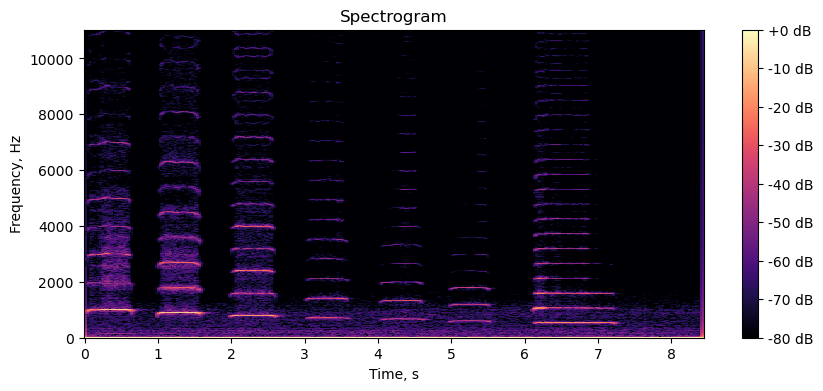

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(d, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.ylabel("Frequency, Hz")
plt.xlabel("Time, s")
plt.show()

In [7]:
soundfile.write("output/filtered.wav", filtered_sample, sample_rate)

In [8]:
frequencies, times, spectogram = signal.spectrogram(
    filtered_sample,
    sample_rate,
    scaling='spectrum',
    window=('hann',))

energies = np.sum(spectogram, axis=0)
peaks, _ = signal.find_peaks(energies, distance=1)

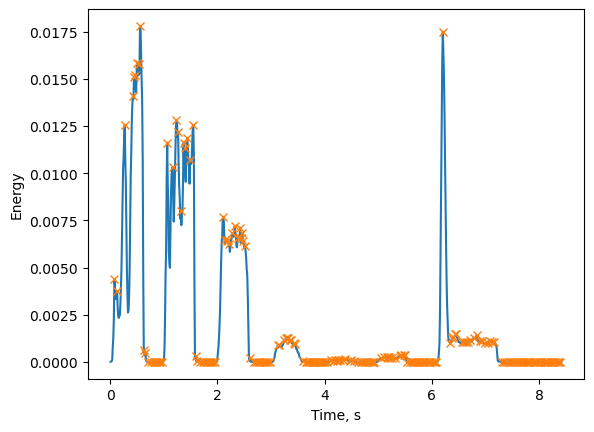

In [9]:
plt.figure()
plt.plot(times, energies)
plt.plot(times[peaks], energies[peaks], "x")
plt.xlabel('Time, s')
plt.ylabel('Energy')
plt.show()